# Health Insurance Cross Sell Prediction 🏠🏥

## Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers. Now, they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.<br> An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified **premium**. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.<br> Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Business Goal

The aim of the project is to build a model to predict whether a customer would be interested in Vehicle Insurance. This is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Before starting with the model building, let's take a look at the dataset.

## Data Preparation and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [4]:
pred_df = pd.read_csv("test.csv", index_col=0)
pred_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 381110 to 508146
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 10.7+ MB


Therefore, apart from the `id` variable, which is used as the index of the DataFrames, the train dataset `df` contains the following variables:
* `Gender`: Gender of the customer;
* `Age`: Age of the customer;
* `Driving_License`:
    * 0 : Customer doesn't have DL;
    * 1 : Customer already has DL.
* `Region_Code`: Unique code for the region of the customer;
* `Previously_Insured`:
    * 0 : Customer doesn't have Vehicle Insurance;
    * 1 : Customer already has Vehicle Insurance.
* `Vehicle_Age`: Age of the Vehicle;
* `Vehicle_Damage`:
    * 0 : Customer didn't get his/her vehicle damaged in the past;
    * 1 : Customer got his/her vehicle damaged in the past.
* `Annual_Premium`: The amount customer needs to pay as premium in the year.
* `Policy_Sales_Channel`: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.;
* `Vintage`: Number of Days, Customer has been associated with the company;
* `Response`:
    * 0 : Customer isn't interested in Vehicle Insurance provided by the company;
    * 1 : Customer is interested in Vehicle Insurance provided by the company.
    
On the other hand, `pred_df` contains the same variables as `df` but `Response`, which represents the target variable of our problem, namely the variable to predict.

Let's check for missing or null values in the DataFrames:

In [6]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
pred_df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

Since both of them have no missing values, we don't need to deal with them.<br> The only continuous variables are `Age`, `Annual_Premium` and `Vintage`:

In [8]:
s = df[["Age", "Vehicle_Age", "Annual_Premium", "Vintage"]]
s.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


All the remaining variables are categorical. Most of them are already encoded, but three of them assume string values, and they are `Gender`, `Vehicle_Age`, and `Vehicle_Damage`:

* `Gender` and `Vehicle_Damage` are dichotomous variables, and we are going to perform **Label Encoding** on them;
* `Vehicle_Age` is an ordinal categorical variable with 3 levels, and therefore we are going to apply the **Ordinal Encoding** method.  

In [9]:
print("Train set:\n")
print(df["Gender"].value_counts())
print(df["Vehicle_Damage"].value_counts())
print("---------------------------")
print("Test set:\n")
print(pred_df["Gender"].value_counts())
print(pred_df["Vehicle_Damage"].value_counts())

Train set:

Male      206089
Female    175020
Name: Gender, dtype: int64
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
---------------------------
Test set:

Male      68236
Female    58801
Name: Gender, dtype: int64
Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64


In [10]:
# Label Encoding:
gender_map={"Female":0, "Male":1}
df["Gender"]=df["Gender"].map(gender_map)
pred_df["Gender"]=pred_df["Gender"].map(gender_map)

vehicle_damage_map={"No":0, "Yes":1}
df["Vehicle_Damage"]=df["Vehicle_Damage"].map(vehicle_damage_map)
pred_df["Vehicle_Damage"]=pred_df["Vehicle_Damage"].map(vehicle_damage_map)

In [11]:
print("Train set:\n")
print(df["Vehicle_Age"].value_counts())
print("---------------------------")
print("Test set:\n")
print(pred_df["Vehicle_Age"].value_counts())

Train set:

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
---------------------------
Test set:

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64


In [12]:
# Ordinal Encoding:
vehicle_age_map={"< 1 Year":1, "1-2 Year":2, "> 2 Years":3}
df["Vehicle_Age"]=df["Vehicle_Age"].map(vehicle_age_map)
pred_df["Vehicle_Age"]=pred_df["Vehicle_Age"].map(vehicle_age_map)

In [13]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,1,2,0,30170.0,26.0,88,0
381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [14]:
pred_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
381111,1,40,1,28.0,0,2,1,33762.0,7.0,111
381112,1,47,1,28.0,0,2,1,40050.0,124.0,199
381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
508143,0,38,1,28.0,0,2,1,28700.0,122.0,165
508144,1,21,1,46.0,1,1,0,29802.0,152.0,74


Finally, we now consider two of the already encoded categorical variables: `Region_Code` and `Policy_Sales_Channel`. Let us look at the relative frequencies of their levels:

In [15]:
num_levels_train = df["Region_Code"].nunique()
num_levels_pred = pred_df["Region_Code"].nunique()
print("Train set:\n")
print(f"Number of levels: {num_levels_train}")
print("-----------------")
print(df["Region_Code"].value_counts(normalize=True).head(30))
print("---------------------------")
print("Test set:\n")
print(f"Number of levels: {num_levels_pred}")
print("-----------------")
print(pred_df["Region_Code"].value_counts(normalize=True).head(30))

Train set:

Number of levels: 53
-----------------
28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
30.0    0.031988
29.0    0.029034
50.0    0.026877
3.0     0.024274
11.0    0.024224
36.0    0.023083
33.0    0.020083
47.0    0.019511
35.0    0.018215
6.0     0.016478
45.0    0.014707
37.0    0.014434
18.0    0.013521
48.0    0.012283
14.0    0.012275
39.0    0.012185
10.0    0.011477
21.0    0.011194
2.0     0.010595
13.0    0.010590
7.0     0.008604
12.0    0.008391
9.0     0.008137
27.0    0.007407
32.0    0.007313
Name: Region_Code, dtype: float64
---------------------------
Test set:

Number of levels: 53
-----------------
28.0    0.279619
8.0     0.086770
46.0    0.052016
41.0    0.048309
15.0    0.034966
30.0    0.032156
29.0    0.029739
50.0    0.026874
3.0     0.024387
11.0    0.024371
36.0    0.022820
33.0    0.020884
47.0    0.019727
35.0    0.018632
6.0     0.016302
45.0    0.015255
37.0    0.014500
18.0    0.013776
48.0    0.012540
14.0

In [16]:
num_levels_train = df["Policy_Sales_Channel"].nunique()
num_levels_pred = pred_df["Policy_Sales_Channel"].nunique()
print("Train set:\n")
print(f"Number of levels: {num_levels_train}")
print("-----------------")
print(df["Policy_Sales_Channel"].value_counts(normalize=True).head(30))
print("---------------------------")
print("Test set:\n")
print(f"Number of levels: {num_levels_pred}")
print("-----------------")
print(pred_df["Policy_Sales_Channel"].value_counts(normalize=True).head(30))

Train set:

Number of levels: 155
-----------------
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
122.0    0.026056
157.0    0.017538
154.0    0.015725
151.0    0.010194
163.0    0.007591
13.0     0.004894
25.0     0.004849
7.0      0.004193
8.0      0.003975
30.0     0.003700
55.0     0.003317
155.0    0.003238
11.0     0.003157
1.0      0.002818
52.0     0.002768
125.0    0.002692
15.0     0.002330
29.0     0.002212
12.0     0.002055
120.0    0.002018
24.0     0.001968
31.0     0.001656
14.0     0.001632
153.0    0.001593
61.0     0.001519
Name: Policy_Sales_Channel, dtype: float64
---------------------------
Test set:

Number of levels: 145
-----------------
152.0    0.352173
26.0     0.211702
124.0    0.191314
160.0    0.057550
156.0    0.028748
122.0    0.026048
157.0    0.017900
154.0    0.015704
151.0    0.010910
163.0    0.007533
13.0     0.004983
25.0     0.004400
7.0      0.004400
8.0      0.004030
30.0     0.003834
55.0     0.00326

Both of them contain a big number of levels, therefore it was decided to perform the **Top-N encoding**, in order to retain information about the most common categories while reducing the number of levels. In other words, instead of considering all levels, we encode the top N most frequent categories and treat the remaining categories as a separate "Other" category. The value of $N$ was chosen according to the relative frequencies, setting $0.01$ as threshold. Therefore, the levels with a relative frequency bigger than $0.01$ are considered as separate, while aggregating the remaining ones:

In [17]:
# Calculate the relative frequency of each category:
category_counts = df["Policy_Sales_Channel"].value_counts(normalize=True)

threshold = 0.01

# Select categories with counts above the threshold:
top_categories = category_counts[category_counts > threshold].index

# Create a new column for encoding:
df.insert(df.columns.get_loc('Policy_Sales_Channel') + 1, 'TopN_Encoding_Channel', df['Policy_Sales_Channel'])
pred_df.insert(pred_df.columns.get_loc('Policy_Sales_Channel') + 1,
               'TopN_Encoding_Channel',
               pred_df['Policy_Sales_Channel'])

# Assign a common label to the remaining categories:
df.loc[~df['Policy_Sales_Channel'].isin(top_categories), 'TopN_Encoding_Channel'] = 'Other'
pred_df.loc[~pred_df['Policy_Sales_Channel'].isin(top_categories), 'TopN_Encoding_Channel'] = 'Other'

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,TopN_Encoding_Channel,Vintage,Response
id,,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,1,2,0,30170.0,26.0,26.0,88,0
381106,1,30,1,37.0,1,1,0,40016.0,152.0,152.0,131,0
381107,1,21,1,30.0,1,1,0,35118.0,160.0,160.0,161,0


In [18]:
pred_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,TopN_Encoding_Channel,Vintage
id,,,,,,,,,,,
381110,1,25,1,11.0,1,1,0,35786.0,152.0,152.0,53
381111,1,40,1,28.0,0,2,1,33762.0,7.0,Other,111
381112,1,47,1,28.0,0,2,1,40050.0,124.0,124.0,199
381113,1,24,1,27.0,1,1,1,37356.0,152.0,152.0,187
381114,1,27,1,28.0,1,1,0,59097.0,152.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,37.0,1,1,0,30867.0,152.0,152.0,56
508143,0,38,1,28.0,0,2,1,28700.0,122.0,122.0,165
508144,1,21,1,46.0,1,1,0,29802.0,152.0,152.0,74


In [19]:
# Calculate the relative frequency of each category:
category_counts = df['Region_Code'].value_counts(normalize=True)

# Select categories with counts above the threshold:
top_categories = category_counts[category_counts > threshold].index

# Create a new column for encoding:
df.insert(df.columns.get_loc("Region_Code") + 1, 'TopN_Encoding_Region', df['Region_Code'])
pred_df.insert(pred_df.columns.get_loc("Region_Code") + 1, 'TopN_Encoding_Region', pred_df['Region_Code'])

# Assign a common label to the remaining categories:
df.loc[~df['Region_Code'].isin(top_categories), 'TopN_Encoding_Region'] = 'Other'
pred_df.loc[~pred_df['Region_Code'].isin(top_categories), 'TopN_Encoding_Region'] = 'Other'

df

,Gender,Age,Driving_License,Region_Code,TopN_Encoding_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,TopN_Encoding_Channel,Vintage,Response
id,,,,,,,,,,,,,
1,1,44,1,28.0,28.0,0,3,1,40454.0,26.0,26.0,217,1
2,1,76,1,3.0,3.0,0,2,0,33536.0,26.0,26.0,183,0
3,1,47,1,28.0,28.0,0,3,1,38294.0,26.0,26.0,27,1
4,1,21,1,11.0,11.0,1,1,0,28619.0,152.0,152.0,203,0
5,0,29,1,41.0,41.0,1,1,0,27496.0,152.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,Other,1,2,0,30170.0,26.0,26.0,88,0
381106,1,30,1,37.0,37.0,1,1,0,40016.0,152.0,152.0,131,0
381107,1,21,1,30.0,30.0,1,1,0,35118.0,160.0,160.0,161,0


In [20]:
pred_df

,Gender,Age,Driving_License,Region_Code,TopN_Encoding_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,TopN_Encoding_Channel,Vintage
id,,,,,,,,,,,,
381110,1,25,1,11.0,11.0,1,1,0,35786.0,152.0,152.0,53
381111,1,40,1,28.0,28.0,0,2,1,33762.0,7.0,Other,111
381112,1,47,1,28.0,28.0,0,2,1,40050.0,124.0,124.0,199
381113,1,24,1,27.0,Other,1,1,1,37356.0,152.0,152.0,187
381114,1,27,1,28.0,28.0,1,1,0,59097.0,152.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,37.0,37.0,1,1,0,30867.0,152.0,152.0,56
508143,0,38,1,28.0,28.0,0,2,1,28700.0,122.0,122.0,165
508144,1,21,1,46.0,46.0,1,1,0,29802.0,152.0,152.0,74


We can now remove the `Region_Code` and `Policy_Sales_Channel` variables:

In [21]:
df = df.drop(["Region_Code", "Policy_Sales_Channel"], axis=1)
pred_df = pred_df.drop(["Region_Code", "Policy_Sales_Channel"], axis=1)

Before applying the **One-Hot Encoding** to the `TopN_Encoding_Region` and `TopN_Encoding_Channel` variables, let us plot a normalized stacked bar plot by `Response` for both of them and check whether there is a statistically significant relationship between each of them and the target variable:  

In [22]:
def plot_and_test(data, main_var, grouping_var, colors=None, legend_labels=None):

    contingency_table = pd.crosstab(df[main_var], df[grouping_var])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square statistic: {chi2:.3f}")
    print(f"p-value: {p_value:.3f}")
    if p_value < 0.05:
        print("There is a statistically significant relationship between the two categorical variables.")
    else:
        print("There is no statistically significant relationship between the two categorical variables.")
    
    #count_table = df.groupby([main_var, grouping_var]).size().unstack()
    #prop_table = count_table.div(count_table.sum(axis=1), axis=0)
    prop_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    plt.rcParams["figure.figsize"] = (16,10)
    
    # Plot the normalized stacked bar plot using seaborn
    if colors is not None:
        colors = colors
        ax = prop_table.plot(kind='bar', stacked=True, color=colors)
    else:
        ax = prop_table.plot(kind='bar', stacked=True)

    # Set the title and axis labels
    ax.set_title(f'Proportion of {grouping_var} levels by {main_var}')
    ax.set_xlabel(main_var)
    ax.set_ylabel('Proportion (%)')

    # Change the orientation of x labels to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    if legend_labels is not None:
        handles, labels = ax.get_legend_handles_labels()
        new_labels = legend_labels
        ax.legend(handles, new_labels)

    # Add percentage values to each bar
    total = prop_table.sum(axis=1)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total[(p.get_x()+(p.get_x()+p.get_width()))/2])
        x = (p.get_x() + (p.get_x()+p.get_width()))/2
        y = (p.get_y() + (p.get_y()+p.get_height()))/2
        ax.annotate(percentage, (x, y), ha='center', va='center')

    # Change the y-tick labels
    y_ticks = [0,0.2,0.4,0.6,0.8,1]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(['{:.0f}%'.format(tick*100) for tick in y_ticks])

    # Show the plot
    plt.show()

Chi-Square statistic: 24353.661
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


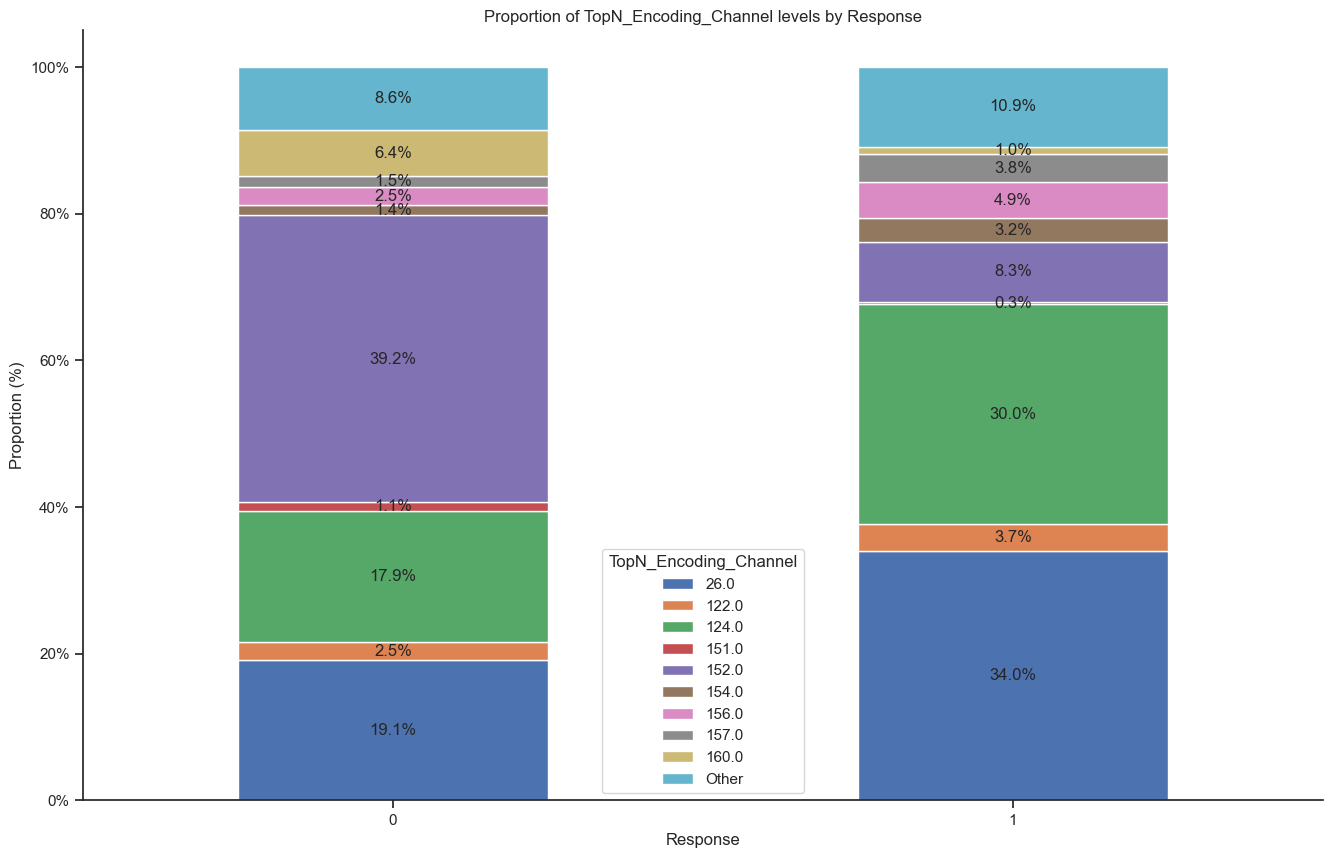

In [23]:
plot_and_test(df,
              "Response",
              "TopN_Encoding_Channel"
             )

A statistically significant relationship between the two variables is found. The plot shows that the most frequent channel is `152` for `Response == 0`, while it is `26` for `Response == 1`.

Chi-Square statistic: 6615.459
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


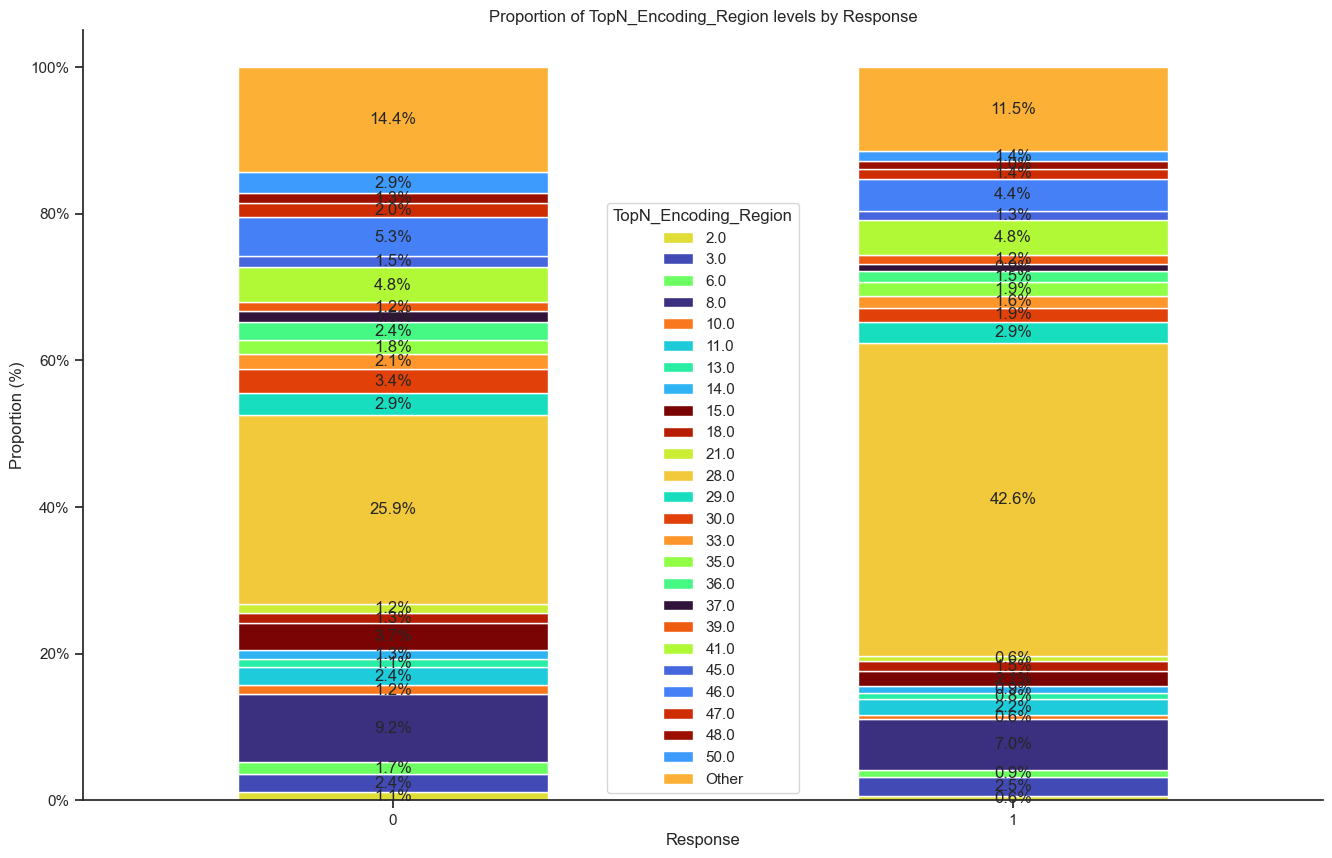

In [24]:
plot_and_test(
    df,
    "Response",
    "TopN_Encoding_Region",
    colors = plt.cm.get_cmap('turbo')(np.random.permutation(np.linspace(0, 1, df["TopN_Encoding_Region"].unique().shape[0])))
)

A statistically significant relationship between the two variables is found also in this case, with the most frequent Region being the one with code `28` in both groups.

Let's perform the **One-Hot Encoding** of `TopN_Encoding_Channel` and `TopN_Encoding_Region`:

In [25]:
df = pd.get_dummies(df,
                    columns=["TopN_Encoding_Region", "TopN_Encoding_Channel"],
                    prefix=["Region_Code", "Policy_Sales_Channel"]
                   )

pred_df = pd.get_dummies(pred_df,
                         columns=["TopN_Encoding_Region", "TopN_Encoding_Channel"],
                         prefix=["Region_Code", "Policy_Sales_Channel"]
                        )

df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_2.0,...,Policy_Sales_Channel_26.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_151.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_Other
id,,,,,,,,,,,,,,,,,,,,,
1,1,44,1,0,3,1,40454.0,217,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,76,1,0,2,0,33536.0,183,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,47,1,0,3,1,38294.0,27,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,21,1,1,1,0,28619.0,203,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,29,1,1,1,0,27496.0,39,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,1,2,0,30170.0,88,0,0,...,1,0,0,0,0,0,0,0,0,0
381106,1,30,1,1,1,0,40016.0,131,0,0,...,0,0,0,0,1,0,0,0,0,0
381107,1,21,1,1,1,0,35118.0,161,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
pred_df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_2.0,Region_Code_3.0,...,Policy_Sales_Channel_26.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_151.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_Other
id,,,,,,,,,,,,,,,,,,,,,
381110,1,25,1,1,1,0,35786.0,53,0,0,...,0,0,0,0,1,0,0,0,0,0
381111,1,40,1,0,2,1,33762.0,111,0,0,...,0,0,0,0,0,0,0,0,0,1
381112,1,47,1,0,2,1,40050.0,199,0,0,...,0,0,1,0,0,0,0,0,0,0
381113,1,24,1,1,1,1,37356.0,187,0,0,...,0,0,0,0,1,0,0,0,0,0
381114,1,27,1,1,1,0,59097.0,297,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508142,0,26,1,1,1,0,30867.0,56,0,0,...,0,0,0,0,1,0,0,0,0,0
508143,0,38,1,0,2,1,28700.0,165,0,0,...,0,1,0,0,0,0,0,0,0,0
508144,1,21,1,1,1,0,29802.0,74,0,0,...,0,0,0,0,1,0,0,0,0,0


These are the datasets we are going to use for model building and prediction, but we firstly finish analyzing the relationships between the features and the target variable:  

Chi-Square statistic: 1047.708
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


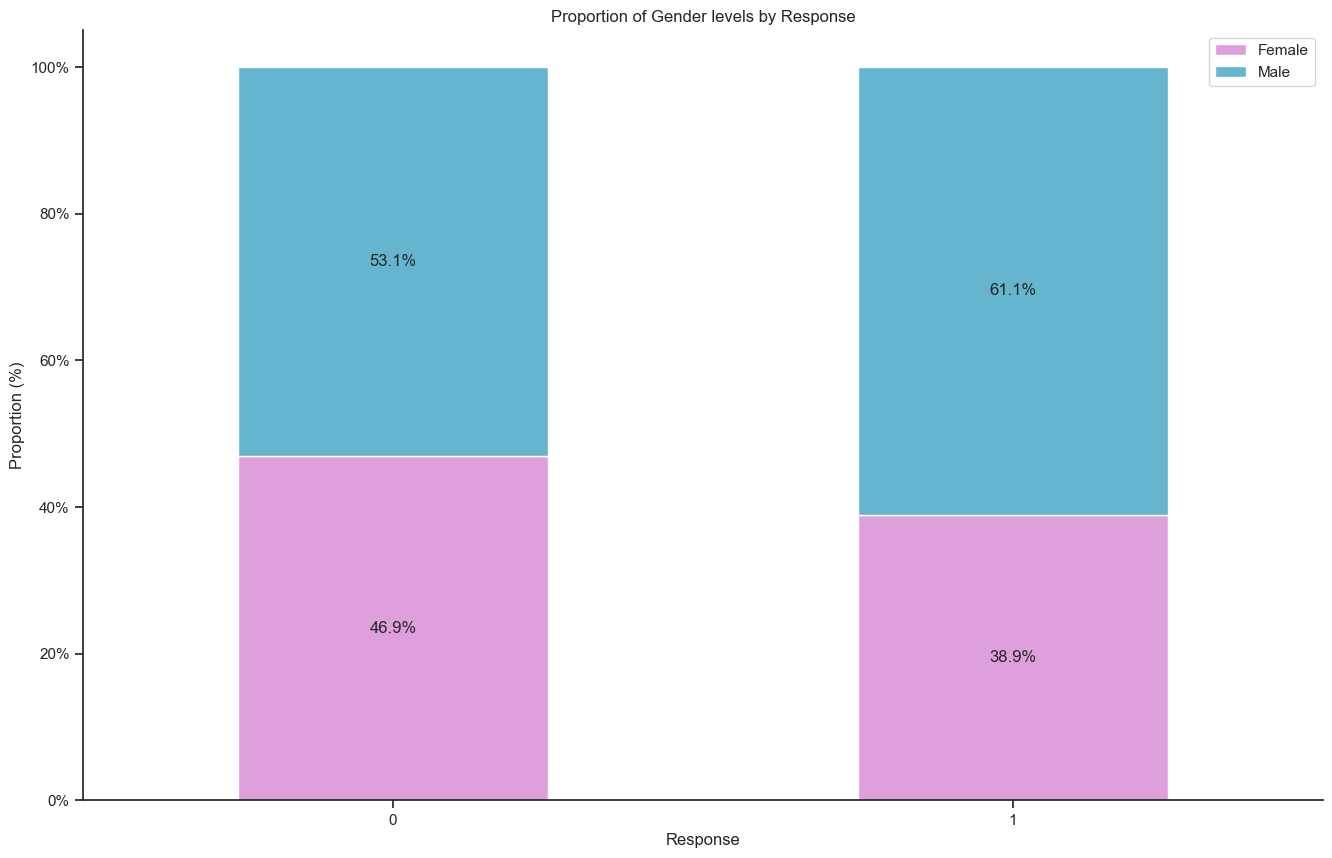

In [27]:
plot_and_test(df, "Response", "Gender", colors=['plum', 'c'], legend_labels=['Female', 'Male'])

This barplot shows that the proportion of Males increases when moving from the `Response == 0` class to the `Response == 1` class, and this increase is statistically significant, as shown by the Chi-Square Test.

Chi-Square statistic: 44357.965
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


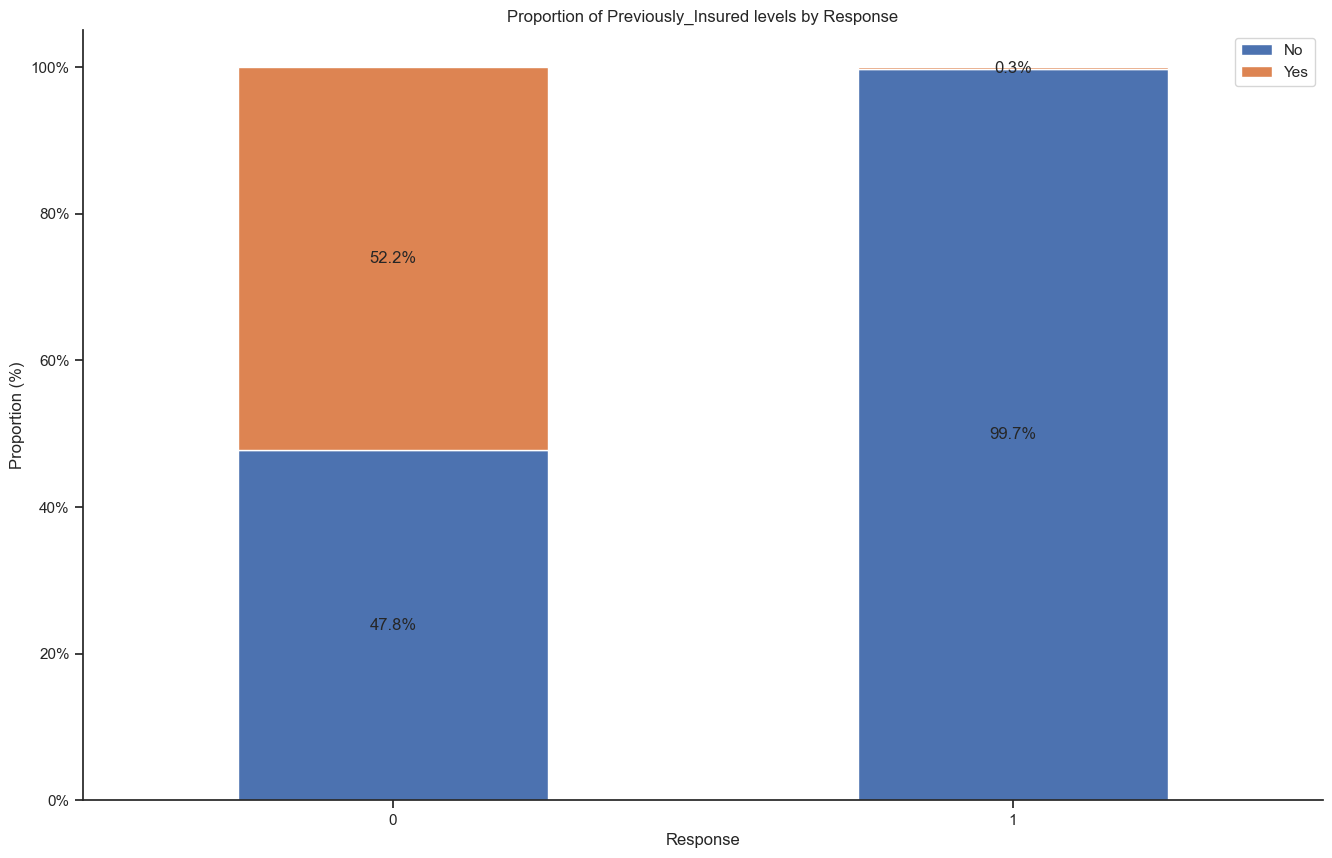

In [28]:
plot_and_test(df, "Response", "Previously_Insured", legend_labels=['No', 'Yes'])

Chi-Square statistic: 47864.762
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


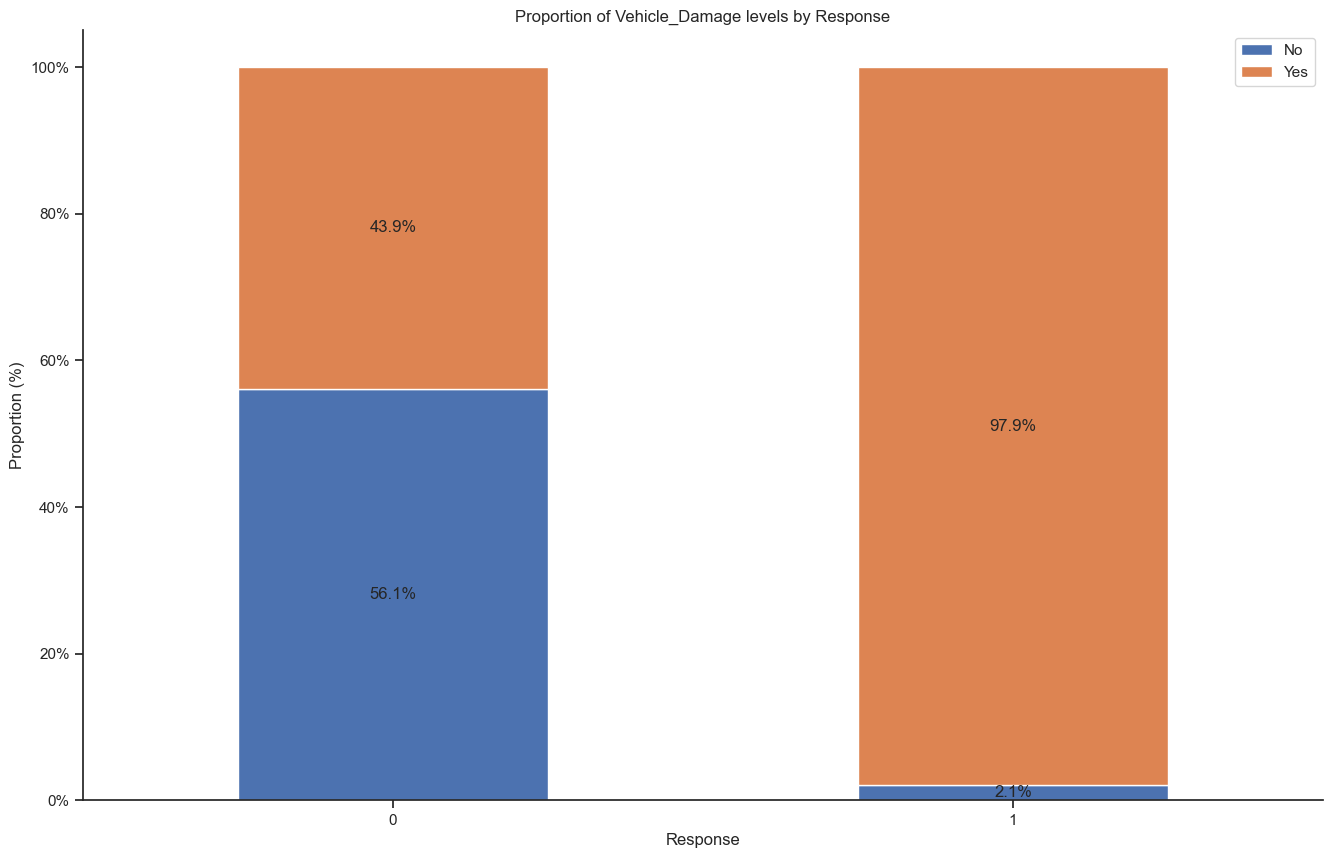

In [29]:
plot_and_test(df,
              "Response",
              "Vehicle_Damage",
              legend_labels=['No', 'Yes']
             )

As expected, it is found that almost all of the customers interested in Vehicle Insurance provided by the company:

* don't have Vehicle Insurance yet;
* got their vehicle damaged in the past. 

Chi-Square statistic: 18771.890
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


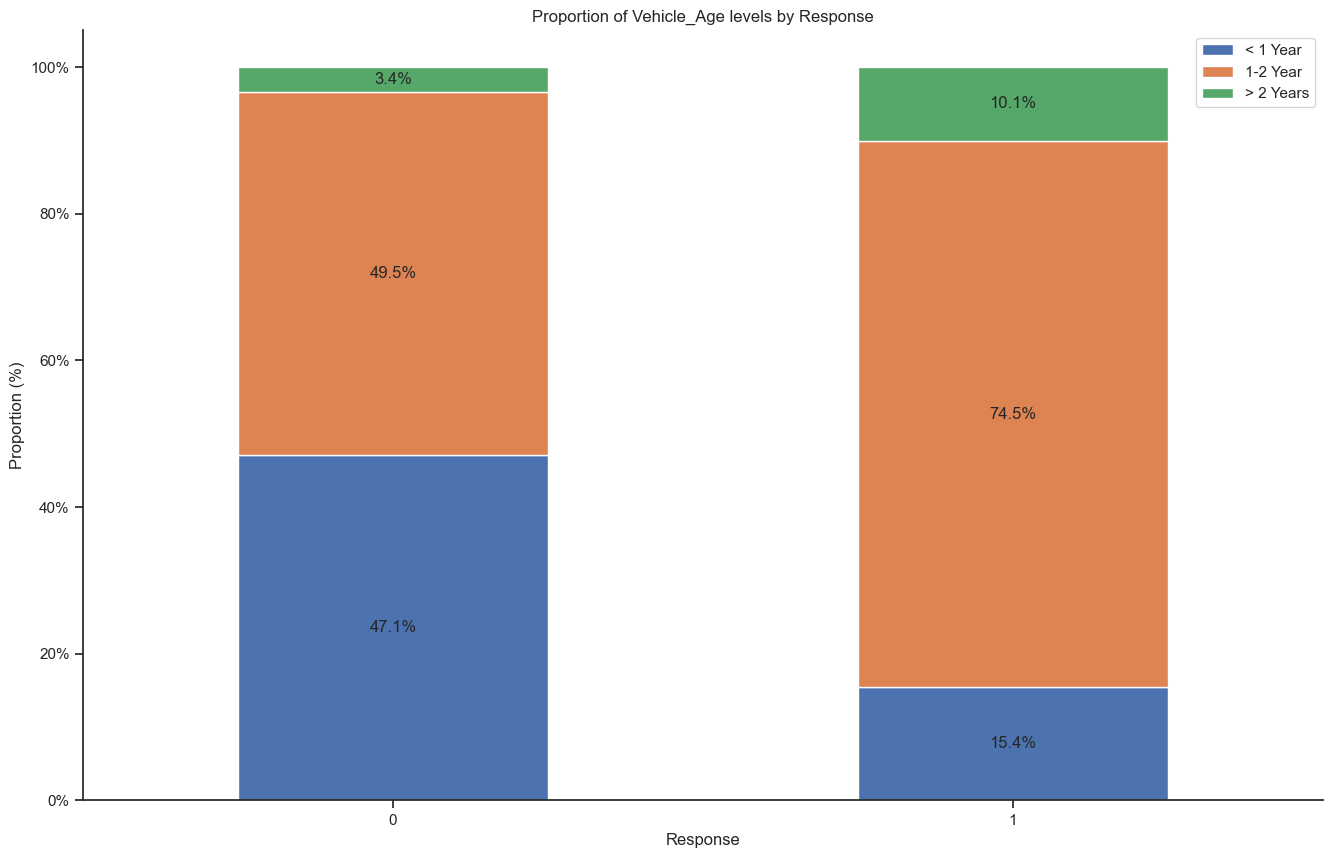

In [30]:
plot_and_test(df,
              "Response",
              "Vehicle_Age",
              legend_labels=['< 1 Year', '1-2 Year', '> 2 Years']
             )

In this case, the percentage of customers with age of the Vehicle ranging from 1 to 2 years significantly increase when moving from the Not Intersted to Interested policyholders. 

Chi-Square statistic: 38.634
p-value: 0.000
There is a statistically significant relationship between the two categorical variables.


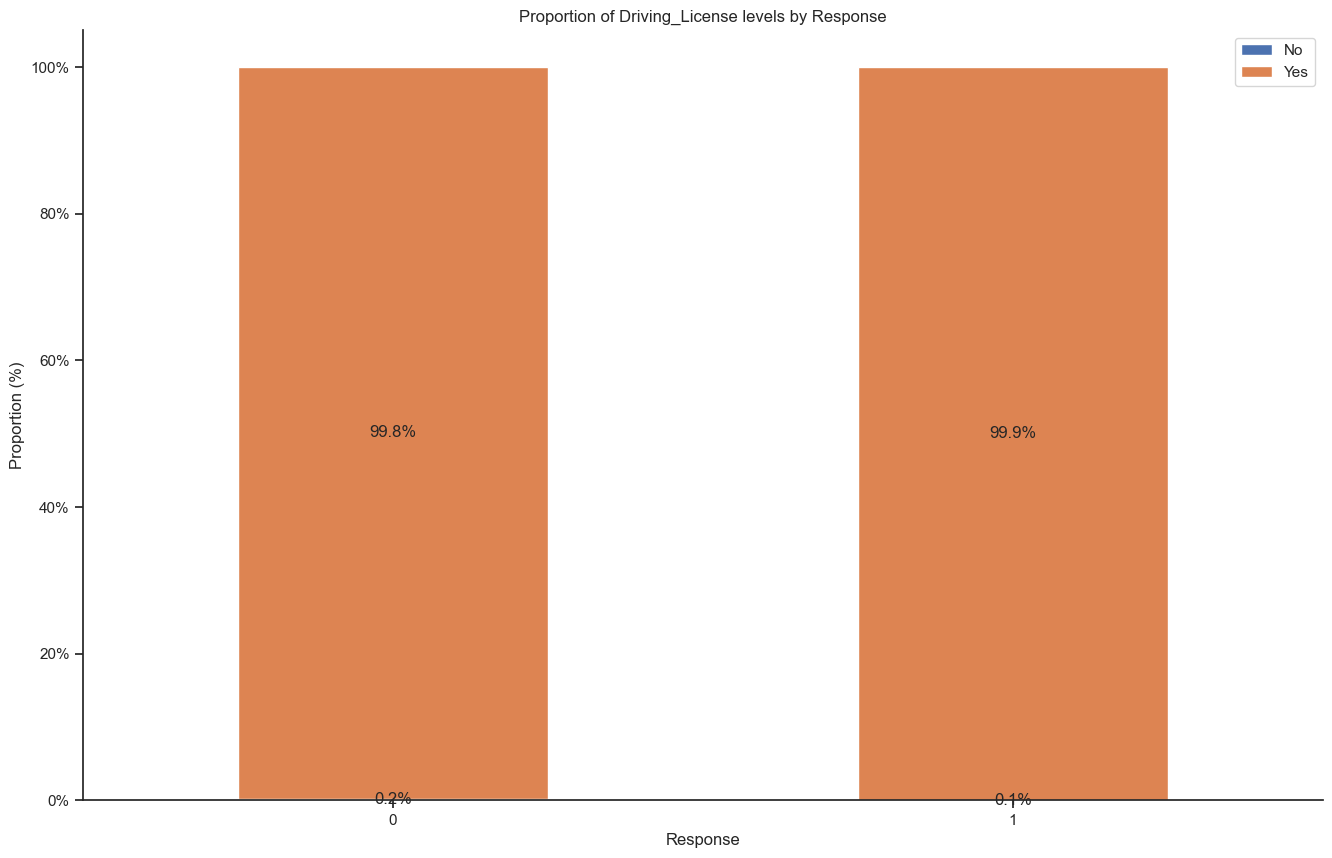

In [31]:
plot_and_test(df,
              "Response",
              "Driving_License",
              legend_labels=['No', 'Yes']
             )

In [32]:
df["Driving_License"].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Almost all of the instances contain information about customers with Driving License, and their percentage increases even more when going from the `Response == 0` class to the `Response == 1` class, as expected.

Finally, let us analyze the relationship between the `Response` variable and the 3 continuous variables contained in the dataset, starting with `Age`:

In [33]:
from scipy.stats import shapiro


def normality_check(data, main_var):
    # Filter the DataFrame for each Response category:
    response_0 = data[data['Response'] == 0][main_var]
    response_1 = data[data['Response'] == 1][main_var]

    # Compute skewness and perform Shapiro-Wilk test for each Response category:
    skewness_0 = response_0.skew()
    skewness_1 = response_1.skew()
    statistic_0, p_value_0 = shapiro(response_0)
    statistic_1, p_value_1 = shapiro(response_1)

    # Print the test results:
    print('Response 0:')
    print(f'Skewness: {skewness_0:.4f}')
    print(f'Statistic: {statistic_0:.4f}')
    print(f'p-value: {p_value_0:.4f}')
    print('------------------------')
    print('Response 1:')
    print(f'Skewness: {skewness_1:.4f}')
    print(f'Statistic: {statistic_1:.4f}')
    print(f'p-value: {p_value_1:.4f}')
    
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    plt.rcParams["figure.figsize"] = (16,10)
    sns.violinplot(x='Response', y=main_var, data=data)

    # Set labels and title:
    plt.xlabel('Response')
    plt.ylabel(main_var)
    plt.title(f'Violin Plot of {main_var} by Response')

    # Show the plot:
    plt.show()

In [34]:
from scipy.stats import mannwhitneyu

def mann_whitney(data, main_var):
    # Filter the DataFrame for each Response category:
    response_0 = data[data['Response'] == 0][main_var]
    response_1 = data[data['Response'] == 1][main_var]

    # Perform Mann-Whitney U test:
    statistic, p_value = mannwhitneyu(response_0, response_1)

    # Print the test results:
    print(f'Mann-Whitney U statistic: {statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    if p_value < 0.05:
        print("There is a statistically significant relationship between the two variables.")
    else:
        print("There is no statistically significant relationship between the two variables.")

C:\Users\gugli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Response 0:
Skewness: 0.7490
Statistic: 0.8927
p-value: 0.0000
------------------------
Response 1:
Skewness: 0.3225
Statistic: 0.9852
p-value: 0.0000


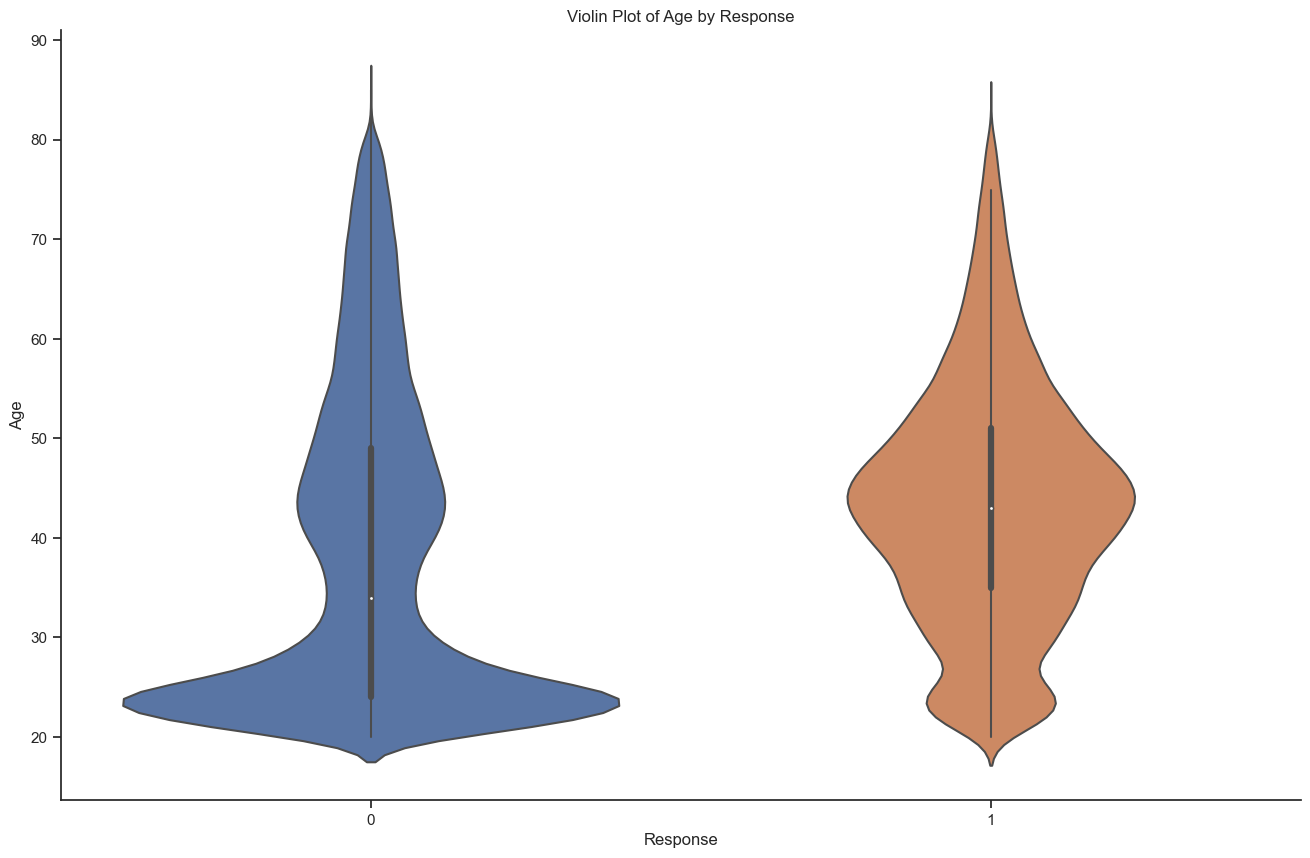

Mann-Whitney U statistic: 5826171170.5000
p-value: 0.0000
There is a statistically significant relationship between the two variables.


In [35]:
normality_check(df, "Age")
mann_whitney(df, "Age")

Both distributions are positively skewed, but the skewness is higher in the case of not interested customers, thus indicating that customers with an age ranging from 40 to 50 tend to be more interested in Vehicle insurance than customers being 20-30 years old.

Response 0:
Skewness: 1.6434
Statistic: 0.8772
p-value: 0.0000
------------------------
Response 1:
Skewness: 2.3941
Statistic: 0.8508
p-value: 0.0000


C:\Users\gugli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


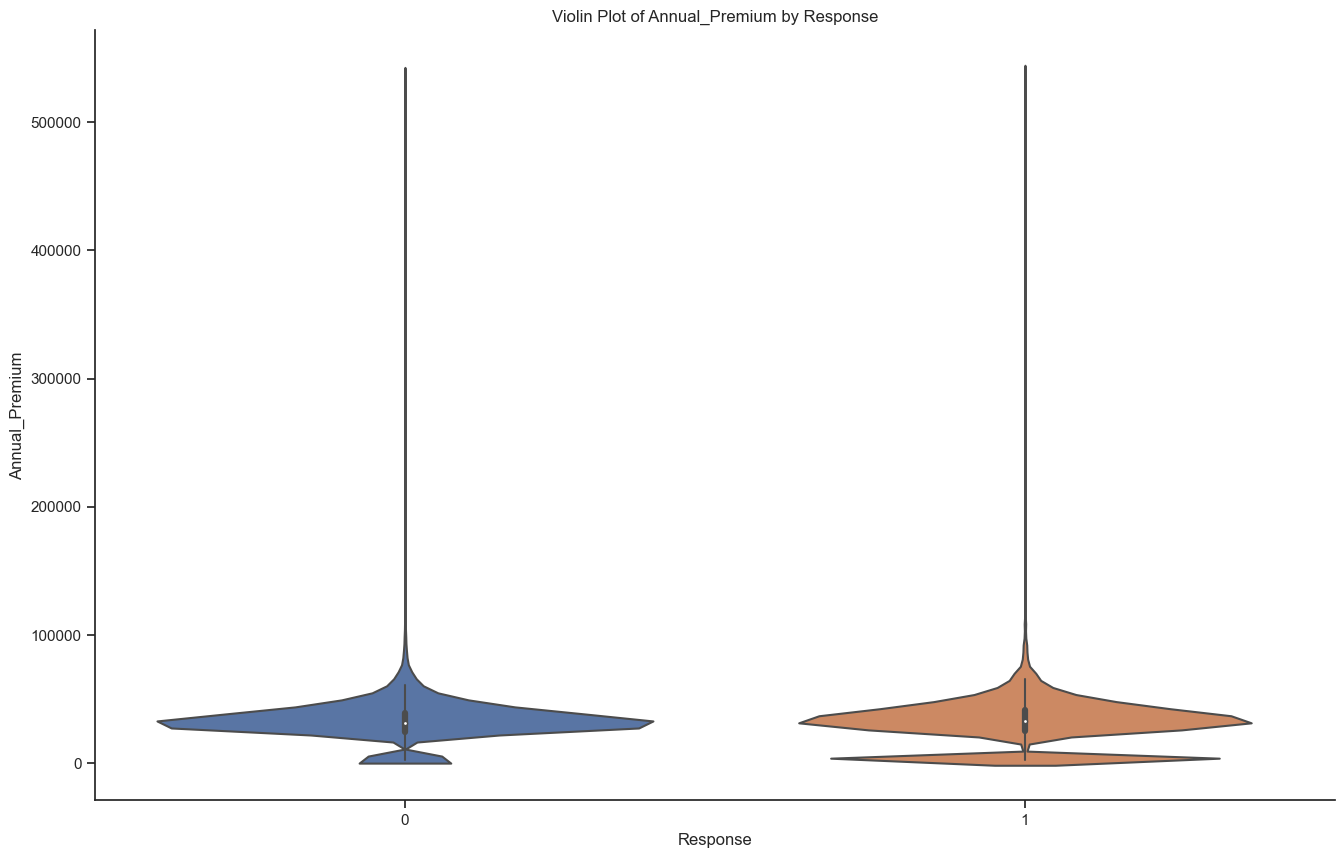

Mann-Whitney U statistic: 7343668645.5000
p-value: 0.0000
There is a statistically significant relationship between the two variables.


In [36]:
normality_check(df, "Annual_Premium")
mann_whitney(df, "Annual_Premium")

By looking at the p-value of the Mann-Whitney U Test, a statistically significant difference is found between the two distributions. In particular, there is an increase in interest for customers paying a lower annual premium for their Health Insurance.

Response 0:
Skewness: 0.0033
Statistic: 0.9550
p-value: 0.0000
------------------------
Response 1:
Skewness: 0.0010
Statistic: 0.9551
p-value: 0.0000


C:\Users\gugli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


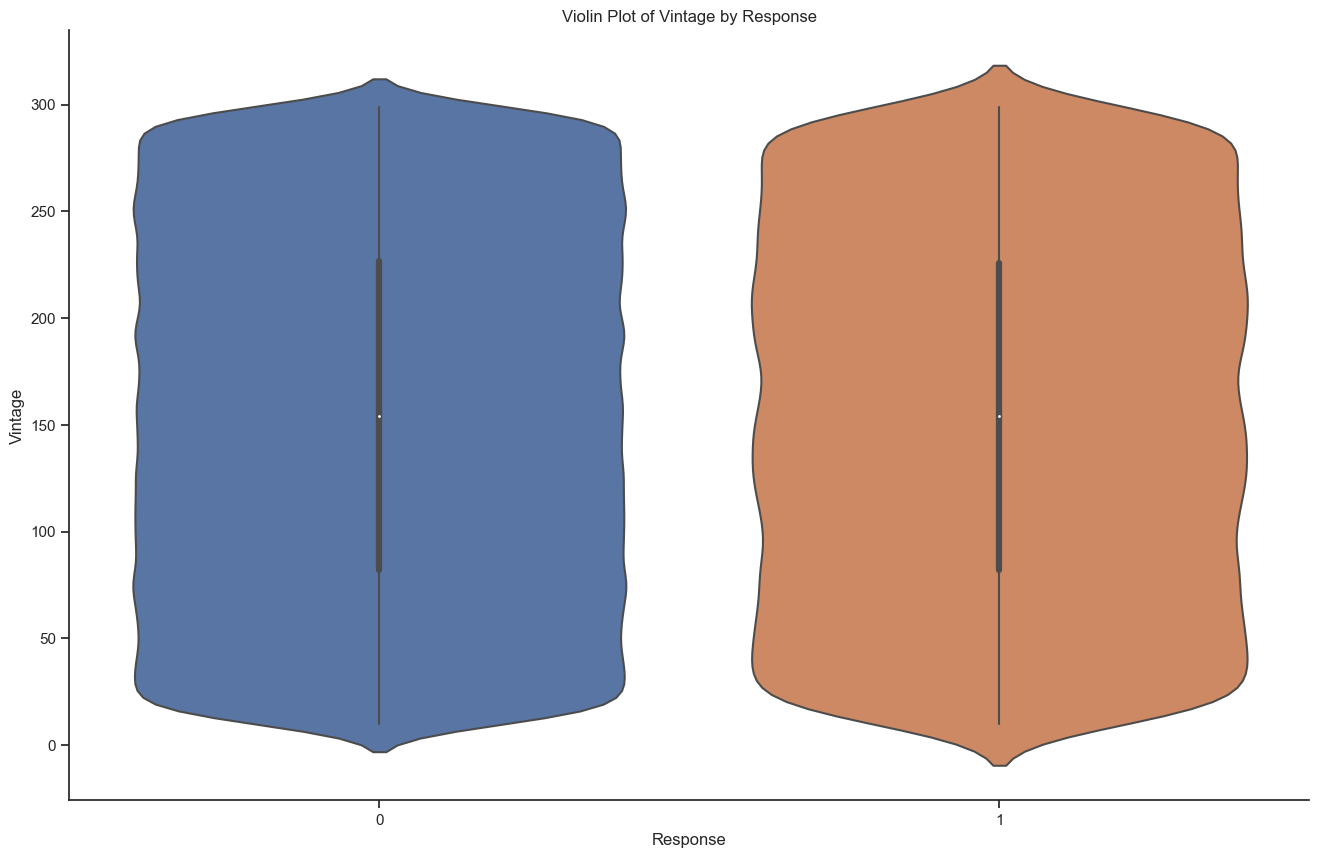

Mann-Whitney U statistic: 7824344800.0000
p-value: 0.5163
There is no statistically significant relationship between the two variables.


In [37]:
normality_check(df, "Vintage")
mann_whitney(df, "Vintage")

In this case, the Mann-Whitney U Test shows that there is no statistically significant relationship between the number of days a customer has been associated with the company and his interest in Vehicle insurance.

In conclusion, it is noted that we are in the presence of an imbalanced dataset:

In [38]:
counts = df["Response"].value_counts()
print(f"Not interested (0) = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%)")
print(f"Interested (1) = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%)")

Not interested (0) = 334399 (87.74%)
Interested (1) = 46710 (12.26%)


We will see how to address this problem shortly. 

## Model Exploration and Selection

In this section, we train and evaluate different classification models, and then select the best-performing model based on certain evaluation metrics.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.pipeline import Pipeline
from collections import Counter

Let us start from a simple logistic regression model in which the class imbalance is not taken into account. This model is built complying with the following procedure:

* The **Stratified K-Folds cross-validator** is used. This cross-validation object is a variation of KFold that returns stratified folds, namely made by preserving the percentage of samples for each class. This procedure ensures that each fold contains a representative sample of each class, reducing the risk of biased evaluation;
* The 3 continuous variables are standardized. They are:
    * `Age` (second column);
    * `Annual_Premium` (seventh column);
    * `Vintage` (eighth column).
* As for the algorithm to use in the optimization problem, it was chosen the `newton-cholesky` solver, which is a good choice for $n_{\text{samples}} \gg n_{\text{features}}$, especially with one-hot encoded categorical features with rare categories;
* Precision and recall are computed on the train and test sets as the averages of the values obtained at each iteration. 

**NOTE**: 
* Precision answers the question: "Of all the instances predicted as positive, how many are actually positive?". It measures the proportion of true positive predictions out of all positive predictions made by the model:

    $$
    \rm{Precision} = \frac{\rm{TP}}{\rm{TP}+\rm{FP}}
    $$

    A high precision indicates that the model has a low false positive rate;

* Recall (or sensitivity) answers the question: "Of all the actual positive instances, how many did the model correctly identify as positive?". It measures the proportion of true positive predictions out of all actual positive instances:

    $$
    \rm{Recall} = \frac{\rm{TP}}{\rm{TP}+\rm{FN}}
    $$

    A high recall indicates that the model has a low false negative rate.

In our case, it is more crucial to avoid missing positive cases, and then to minimize false negatives, even at the cost of some false positives. The reason is that false negatives correspond to customers that are interested in Vehicle insurance but are classified as not interested, and therefore, the more the model wrongly classifies the positive class, the more the company loses potential sales of the insurance. On the other hand, false positives are not interested customers that are classified as interested, and then, in our context, it is a less serious error than the previous one.<br> To summarize, the main goals of our model are:

* to miss the least possible number of interested customers;
* to increase the conversion rate, if compared to that of the original situation.

Indeed, if we contacted all the customers to try and sell the Vehicle insurance, the conversion rate would be:

In [40]:
original_conversion_rate = df["Response"].value_counts()[1]/df.shape[0]
print(f"Original conversion rate: {round(original_conversion_rate*100,2)} %")

Original conversion rate: 12.26 %


Let's say that our objective is to double the conversion rate of the original scenario (12.26%). Therefore, we aim at obtaining a precision score of at least 0.25, and the largest possible value of the recall score. 

Having this in mind, let us then consider the first model, i.e. the simple logistic regression model:

In [41]:
def train_and_test_model(data, target_variable, model_name, k=5, continuous=None,
                         resampling=None, imbalance=False, threshold=None, std=False):
    
    X = data.drop(target_variable,axis=1).values
    y = data[target_variable].values

    kf = StratifiedKFold(n_splits=k, shuffle=True)

    precision_train_scores = []
    precision_test_scores = []
    recall_train_scores = []
    recall_test_scores = []

    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if continuous is not None:
            ss = StandardScaler()
            X_train[:, continuous] = ss.fit_transform(X_train[:, continuous])
            X_test[:, continuous] = ss.transform(X_test[:, continuous])
        
        if resampling is not None:
            transf = resampling
            X_train, y_train = transf.fit_resample(X_train, y_train)
        
        if imbalance:
            lr = LogisticRegression(solver='newton-cholesky', class_weight='balanced')
        else:
            lr = LogisticRegression(solver='newton-cholesky')
        
        lr.fit(X_train, y_train)
        
        if threshold is None:
            y_pred_train = lr.predict(X_train)
            y_pred_test = lr.predict(X_test)
        else:
            y_proba_train = lr.predict_proba(X_train)
            y_pred_train = np.where(y_proba_train[:,1]>threshold, 1, 0)
            y_proba_test = lr.predict_proba(X_test)
            y_pred_test = np.where(y_proba_test[:,1]>threshold, 1, 0)
        
        precision_train_scores.append(precision_score(y_train, y_pred_train))
        precision_test_scores.append(precision_score(y_test, y_pred_test))
        recall_train_scores.append(recall_score(y_train, y_pred_train))
        recall_test_scores.append(recall_score(y_test, y_pred_test))

    scores = {
        'precision_train' : np.array(precision_train_scores),
        'precision_test' : np.array(precision_test_scores),
        'recall_train' : np.array(recall_train_scores),
        'recall_test' : np.array(recall_test_scores)
    }
    
    if std:
        model_metrics = pd.DataFrame(
            [{
                'model' : model_name,
                'precision_train' : "{:.3f}".format(np.mean(scores['precision_train'])),
                'precision_test' : "{:.3f}".format(np.mean(scores['precision_test'])),
                'precision_test_std' : "{:.3f}".format(np.std(scores['precision_test'])),
                'recall_train' : "{:.3f}".format(np.mean(scores['recall_train'])),
                'recall_test' : "{:.3f}".format(np.mean(scores['recall_test'])),
                'recall_test_std' : "{:.3f}".format(np.std(scores['recall_test']))
            }]
        )
    else:
        model_metrics = pd.DataFrame(
            [{
                'model' : model_name,
                'precision_train' : "{:.3f}".format(np.mean(scores['precision_train'])),
                'precision_test' : "{:.3f}".format(np.mean(scores['precision_test'])),
                'recall_train' : "{:.3f}".format(np.mean(scores['recall_train'])),
                'recall_test' : "{:.3f}".format(np.mean(scores['recall_test']))
            }]
        )
    
    return model_metrics

In [42]:
metrics_df = pd.DataFrame(columns=["model", "precision_train" , "precision_test", "recall_train", "recall_test"])

model_metrics = train_and_test_model(df, "Response", "no_imbalance_no_resampling", continuous=[1,6,7])

metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
metrics_df

,model,precision_train,precision_test,recall_train,recall_test
0,no_imbalance_no_resampling,0.285,0.284,0.001,0.001


As expected, the value of the recall is close to 0, meaning that there is a very high false negative rate, and the reason is that we are not taking into account the class imbalance. Therefore, the machine learning algorithm basically ignores the minority class.

Let us now consider a second model, where we specify the `class_weight` parameter to be `balanced`. In this way, the model uses the values of `y` to automatically adjust class weights inversely proportional to class frequencies in the input data as $n_{\rm{samples}} / (n_{\rm{classes}} \cdot \rm{np.bincount(y)})$:

In [43]:
model_metrics = train_and_test_model(
    df,
    "Response",
    "yes_imbalance_no_resampling",
    continuous=[1,6,7],
    imbalance = True
)

metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
metrics_df

,model,precision_train,precision_test,recall_train,recall_test
0,no_imbalance_no_resampling,0.285,0.284,0.001,0.001
1,yes_imbalance_no_resampling,0.277,0.277,0.936,0.936


If compared to the first model, there is only a slight decrease in precision (from 0.291 to 0.277 on the test set), while there is a huge improvement in the value of recall (from 0.001 to 0.936)! Therefore, recalling what has been said before, this model is much better than the first one.

Another approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are:

* to delete examples from the majority class, called **undersampling**;
* to duplicate examples from the minority class, called **oversampling**.

Furthermore, instead of oversampling the minority class, new examples can be synthesized from the existing examples by interpolating between existing minority class instances. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique (SMOTE)**.<br> Actually, when dealing with mixed data type such as continuous and categorical features, as in our case, a proper extension of the SMOTE algorithm has to be used that treats categorical data differently, and this is given by the **SMOTENC** algorithm.

To sum up, we are now going to train and evaluate three classification algorithms, characterized by the use of:

1. Random Undersampling; 
2. Random Oversampling;
3. SMOTENC algorithm.

### Random Undersampling

In [44]:
for ratio in np.arange(.25,1.25,.25):
    
    model_name = "under_"+str(ratio)
    
    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=RandomUnderSampler(sampling_strategy=ratio),
        imbalance=True
    )
    
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

metrics_df

,model,precision_train,precision_test,recall_train,recall_test
0,no_imbalance_no_resampling,0.285,0.284,0.001,0.001
1,yes_imbalance_no_resampling,0.277,0.277,0.936,0.936
2,under_0.25,0.407,0.277,0.935,0.935
3,under_0.5,0.577,0.276,0.937,0.937
4,under_0.75,0.674,0.276,0.937,0.937
5,under_1.0,0.732,0.276,0.938,0.938


Apart from the precision score of the train set, all the other values stay the same for every value of `sampling_strategy`. Therefore, we choose the one with the lowest computational effort, i.e. the one with `sampling_strategy=1`, namely where examples of the majority class are deleted until their number is the same as the examples of the minority class.

### Random Oversampling

In [45]:
for ratio in np.arange(.25,1.25,.25):
    
    model_name = "over_"+str(ratio)
    
    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=RandomOverSampler(sampling_strategy=ratio),
        imbalance=True
    )
    
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

metrics_df

,model,precision_train,precision_test,recall_train,recall_test
0,no_imbalance_no_resampling,0.285,0.284,0.001,0.001
1,yes_imbalance_no_resampling,0.277,0.277,0.936,0.936
2,under_0.25,0.407,0.277,0.935,0.935
3,under_0.5,0.577,0.276,0.937,0.937
4,under_0.75,0.674,0.276,0.937,0.937
5,under_1.0,0.732,0.276,0.938,0.938
6,over_0.25,0.406,0.276,0.937,0.937
7,over_0.5,0.577,0.276,0.937,0.938
8,over_0.75,0.673,0.277,0.936,0.936
9,over_1.0,0.733,0.277,0.936,0.935


Apart from the precision score of the train set, all the other values stay the same for every value of `sampling_strategy`, exactly as for the undersampling. Therefore, also in this case we choose the one with the lowest computational effort, which this time is the one with `sampling_strategy=0.25`, namely where examples from the minority class are duplicated until the ratio between their number and the number of instances of the majority class is 0.25.

### SMOTENC

In [46]:
cat_indices = [num for num in range(df.drop("Response",axis=1).shape[1]) if num not in [1, 6, 7]]

for ratio in np.arange(.25,1.25,.25):
    
    model_name = "SMOTENC_"+str(ratio)
    
    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=SMOTENC(categorical_features=cat_indices, sampling_strategy=ratio),
        imbalance=True
    )
    
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

metrics_df

,model,precision_train,precision_test,recall_train,recall_test
0,no_imbalance_no_resampling,0.285,0.284,0.001,0.001
1,yes_imbalance_no_resampling,0.277,0.277,0.936,0.936
2,under_0.25,0.407,0.277,0.935,0.935
3,under_0.5,0.577,0.276,0.937,0.937
4,under_0.75,0.674,0.276,0.937,0.937
5,under_1.0,0.732,0.276,0.938,0.938
6,over_0.25,0.406,0.276,0.937,0.937
7,over_0.5,0.577,0.276,0.937,0.938
8,over_0.75,0.673,0.277,0.936,0.936
9,over_1.0,0.733,0.277,0.936,0.935


In this case, as the value of `sampling_strategy` increases, apart from the usual increase in the value of `precision_train`, we see an increase in `recall_train` and a slight decrease in `recall_test`. Therefore, in our case, the best model is `SMOTENC_0.25`.

### MODEL SELECTION

According to what has been said before, our goal is to obtain a precision score of at least 0.25, and the largest possible value of the recall score. For this reason, we now try to lower the threshold of the 4 best models found until now (`yes_imbalance_no_resampling`,`under_1.0`,`over_0.25`,`SMOTENC_0.25`), to increase the recall score, even at the cost of slightly increasing the number of false positives, provided that we manage to maintain the precision above 0.25:

In [47]:
final_metrics_df = pd.DataFrame(columns=["model", "precision_train", "precision_test", "precision_test_std",
                                         "recall_train", "recall_test", "recall_test_std"])

for thresh in np.round(np.arange(.2,.5,.1),1):

    model_name = "yes_imbalance_no_resampling_thr_"+str(thresh)

    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        imbalance=True,
        threshold=thresh,
        std=True
    )

    final_metrics_df = pd.concat([final_metrics_df, model_metrics], ignore_index=True)
    
    
    model_name = "under_1_thr_"+str(thresh)

    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=RandomUnderSampler(sampling_strategy=1),
        imbalance=True,
        threshold=thresh,
        std=True
    )
    
    final_metrics_df = pd.concat([final_metrics_df, model_metrics], ignore_index=True)
    
    
    model_name = "over_0.25_thr_"+str(thresh)

    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=RandomOverSampler(sampling_strategy=.25),
        imbalance=True,
        threshold=thresh,
        std=True
    )

    final_metrics_df = pd.concat([final_metrics_df, model_metrics], ignore_index=True)
    
    
    model_name = "SMOTENC_0.25_thr_"+str(thresh)

    model_metrics = train_and_test_model(
        df,
        "Response",
        model_name,
        continuous=[1,6,7],
        resampling=SMOTENC(categorical_features=cat_indices, sampling_strategy=.25),
        imbalance=True,
        threshold=thresh,
        std=True
    )

    final_metrics_df = pd.concat([final_metrics_df, model_metrics], ignore_index=True)

final_metrics_df

,model,precision_train,precision_test,precision_test_std,recall_train,recall_test,recall_test_std
0,yes_imbalance_no_resampling_thr_0.2,0.239,0.239,0.000,0.990,0.990,0.001
1,under_1_thr_0.2,0.692,0.239,0.001,0.990,0.990,0.001
2,over_0.25_thr_0.2,0.360,0.239,0.001,0.990,0.990,0.001
3,SMOTENC_0.25_thr_0.2,0.368,0.244,0.000,0.991,0.986,0.002
4,yes_imbalance_no_resampling_thr_0.3,0.251,0.251,0.000,0.980,0.980,0.001
5,under_1_thr_0.3,0.705,0.251,0.001,0.980,0.980,0.002
6,over_0.25_thr_0.3,0.375,0.251,0.000,0.980,0.980,0.001
7,SMOTENC_0.25_thr_0.3,0.385,0.258,0.001,0.981,0.972,0.003
8,yes_imbalance_no_resampling_thr_0.4,0.260,0.260,0.001,0.969,0.968,0.002
9,under_1_thr_0.4,0.716,0.260,0.001,0.968,0.968,0.001


From this table, we see that setting the threshold to 0.2 leads to precision scores below 0.25. On the other hand, a threshold of 0.3 enables us to have a precision score on the test set above 0.25 and a recall score of 0.98 for the `yes_imbalance_no_resampling`, `under_1`, `over_0.25` models. Among these three models, we choose the one with very similar values of the two metrics for the train and the test set, namely `yes_imbalance_no_resampling`. 

We are now ready to make our predictions. Therefore, let us train the `yes_imbalance_no_resampling` model with threshold equal to `0.3` and use it to make the predictions of the instances of the `pred_df` dataset:

In [51]:
X = df.drop("Response",axis=1).values
y = df["Response"].values
X_pred = pred_df.values

ss = StandardScaler()
X[:, [1,6,7]] = ss.fit_transform(X[:, [1,6,7]])
X_pred[:, [1,6,7]] = ss.transform(X_pred[:, [1,6,7]])

lr = LogisticRegression(solver='newton-cholesky', class_weight='balanced')
lr.fit(X, y)

y_proba_pred = lr.predict_proba(X_pred)
y_pred = np.where(y_proba_pred[:,1]>0.3, 1, 0)

To conclude, we save the result in a CSV file: 

In [52]:
id = pred_df.index.tolist()

df_result = pd.DataFrame({"id":id, "Response":y_pred})
df_result.head(10)

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0
5,381115,0
6,381116,0
7,381117,0
8,381118,1
9,381119,0


In [53]:
df_result.to_csv("response_estimate.csv", index=False)